In [1]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import talib
import matplotlib.pyplot as plt
import mplfinance as mpf
from dataset import kline_data
from dateutil import parser

In [2]:
df = kline_data(interval='4h')
df = df.set_index(df['open_time'].map(parser.parse))
df.drop(columns=['open_time'], inplace=True)

Last saved data candle close time: 2022-02-06 16:00:00


In [3]:
n_data = 120
df = df[-n_data:]

In [4]:
df.tail()

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
open_time,,,,,,,,,,,
2022-02-05 20:00:00,41544.90,41771.85,41349.81,41382.59,2559.49834,2022-02-06 00:00:00,1.064149e+08,96663,1281.83092,5.329828e+07,0.0
2022-02-06 00:00:00,41382.60,41640.00,41340.35,41444.04,2064.25705,2022-02-06 04:00:00,8.570394e+07,97152,974.27570,4.044850e+07,0.0
2022-02-06 04:00:00,41444.03,41714.18,41305.29,41612.33,2267.93171,2022-02-06 08:00:00,9.412769e+07,95608,1144.79622,4.751772e+07,0.0
2022-02-06 08:00:00,41612.32,41700.01,41444.00,41522.00,2030.31116,2022-02-06 12:00:00,8.443672e+07,93893,962.75100,4.004399e+07,0.0
2022-02-06 12:00:00,41522.00,42168.00,41116.56,41519.49,7364.57563,2022-02-06 16:00:00,3.062051e+08,213574,3897.43112,1.621558e+08,0.0


In [5]:
def is_support(df, i):
    sup = df['low'][i] < df['low'][i-1] and df['low'][i] < df['low'][i+1] and \
    df['low'][i+1] < df['low'][i+2] and df['low'][i-1] < df['low'][i-2]
    return sup

In [6]:
def is_resistance(df, i):
    res = df['high'][i] > df['high'][i-1]  and df['high'][i] > df['high'][i+1] \
    and df['high'][i+1] > df['high'][i+2] and df['high'][i-1] > df['high'][i-2]
    return res

In [7]:
def is_far_from_level(l, s, levels):
    return np.sum([abs(l-x) < s  for x in levels]) == 0

In [8]:
s = np.mean(df['high'] - df['low'])

923.3777500000003


In [9]:
levels = []
for i in range(2, df.shape[0] - 2):
    if is_support(df, i):
        l = df['low'][i]
        if is_far_from_level(l, s, levels):
            levels.append((i, l))
    elif is_resistance(df, i):
        l = df['high'][i]
        if is_far_from_level(l, s, levels):
            levels.append((i, l))

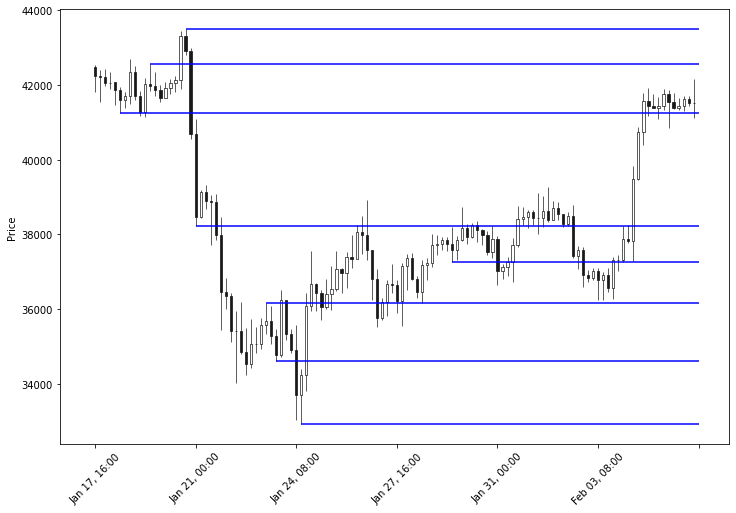

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
mpf.plot(df, type='candle', volume=False, ax=ax)
for level in levels:
    ax.hlines(level[1], xmin=level[0], xmax=n_data, colors='blue')